# 시계열 분석 개요
## 1. 시계열 자료의 이해
- 시간의 흐름에 따라 관찰된 값들
- 시계열 데이터 분석을 통해 미래의 값을 예측하고 경향, 주기, 계절성 등을 파악하여 활용
### 1) 시계열 자료의 종류
|종류|설명|
|--|--|
|비정상성 시계열 자료|시계열 분석을 실시할 때 다루기 어려운 자료; 대부분의 시계열 자료|
|정상성 시계열 자료|비정상 시계열을 핸들링해 다루기 쉬운 시계열 자료로 변환한 자료|
- 정상성
    - 평균과 분산이 일정하고 공분산도 단지 시차에만 의존하고 특정 시점에는 의존하지 않는 상태
    - 일반적인 경향을 알려줌 - 정확성은 떨어짐
    1) 평균이 일정할 경우
        - 모든 시점에 대해 일정한 평균을 갖음
        - 실제 대부분의 자료는 평균이 일정하지 않는데 이 경우 차분(Difference)을 통해 정상화 가능
    2) 분산이 일정할 경우
        - 분산도 특정 시점에 의존하지 않고 일정해야 함
        - 분산이 일정하지 않을 경우 변환(Transformation)을 통해 정상화 가능
    3) 약한 의미의 정상성(약정상성)
        - 모든 시점에 평균 일정, 시점과 분산 독립, 공분산은 시차에만 의존
- 비정상 → 정상: 변환(transformation), 차분(difference)

|이름|설명|
|--|--|
|변환|분산이 일정하지 않은 비정상 시계열에 대해 수행|
|차분(t1-t0)|평균이 일정하지 않은 비정상 시계열에 대해 수행|
|일반차분(regular difference)|바로 전 시점의 자료를 빼는 방법|
|계절차분(seasonal difference)|여러 시점 전의 자료를 빼는 방법, 주로 계절성을 갖는 자료를 정상화하는데 사용|
- 정상 시계열


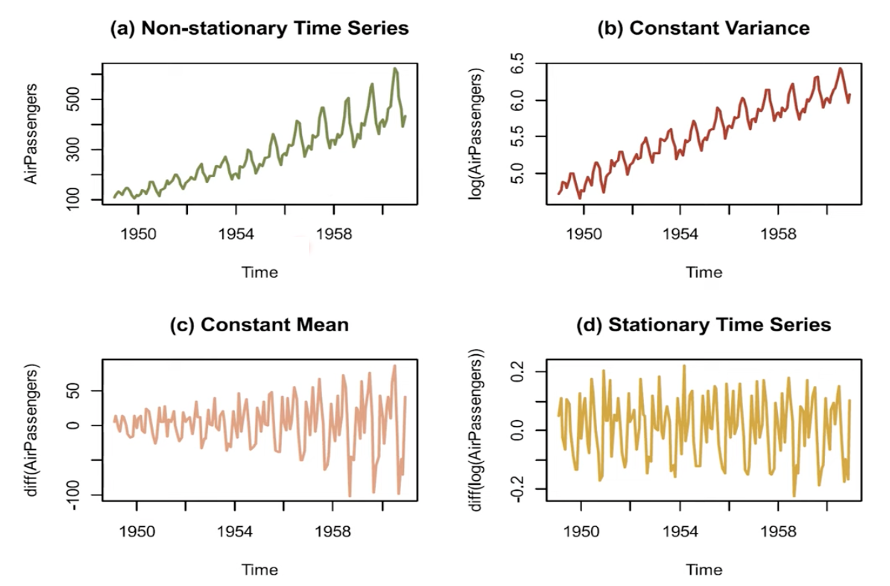

In [1]:
from IPython.display import Image, display
display(Image(filename = 'timeseries1.png'))

|구분 |설명|
|--|--|
|(a)|일반적으로 수집되는 비정상 시계열. 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 형태|
|(b)|(a)상태의 비정상 시계열에 `로그 변환을 수행`하여 변동폭을 일정하게 변경한 상태. 변환을 수행하여 평균을 일정하게 처리함|
|(c)|(a)상태의 비정상 시계열에 `차분을 수행`하여 평균을 일정하게 맞춘 상태. 1차 차분으로 정상성을 띄지 않으면 반복 수행한다. (n차)|
|(d)|(b),(c)를 함께 적용하여 정상 시계열로 변한한 상태|

## 2. 시계열 분석 모형
### 1) AR 모형 (자기회귀모형)
- = Autoregressive Model of order p = AR(p) Model
- 특정 시점 전의 자료가 현재 자료에 영향을 주는 형태
- 판단조건: 자기상관함수(ACF)가 빠르게 감소하고 부분자기상관함수(PACF)는 어느 시점에 절단점을 갖음

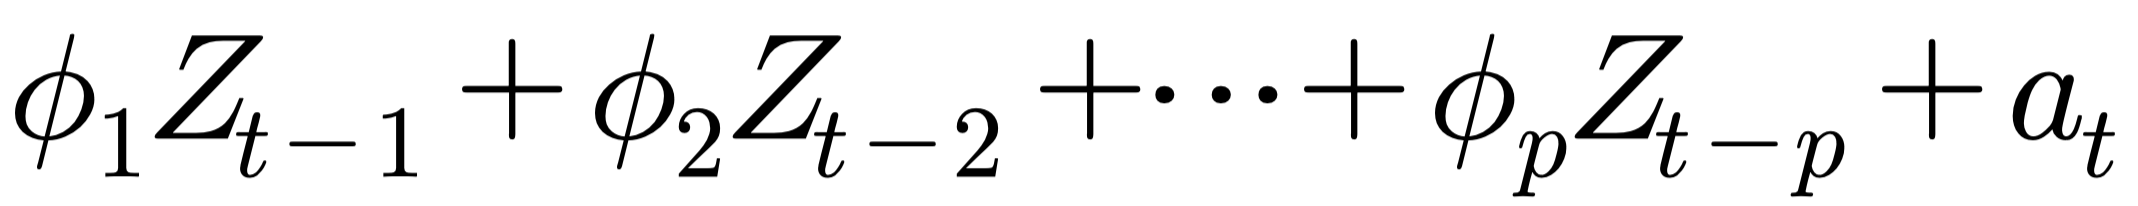

In [2]:
from IPython.display import Image, display
display(Image(filename = 'timeseries2.png'))

### 2) MA 모형 (이동평균모형)
- = Moving Average Model of order q = MA(q) Model
- 유한한 개수의 백색잡음의 결합
- 항상 정상성을 만족
- ACF에서 절단점 갖고 PACF가 빠르게 감소

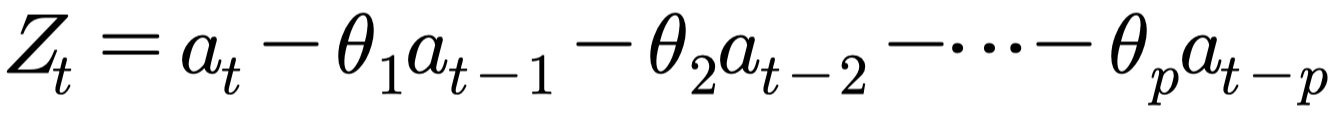

In [3]:
from IPython.display import Image, display
display(Image(filename = 'timeseries3.png'))

### 3) ARIMA 모형 (자기회귀 누적 이동평균 모형)
- 가장 일반적인 모형 (이것만 사용)
- 비정상시계열 모형
- 차분이나 변환을 통해 AR/MA/ARMA 모형으로 정상화 가능
- 세가지 지표를 사용하는 $(p, d, q)$ 모형이라고도 함
    - $p$는 AR 모형과 관련 있는 차수
    - $q$는 MA 모형과 관련 있는 차수
    - $p$와 $q$는 ARIMA 모형에서 ARMA로 정상화 할 때 차분한 횟수를 의미
- 종류
    |종류|의미|
    |--|--|
    |$p=0$|$IMA(d, q)$ 모형이라 칭함, $d$ 번 차분하면 $MA(q)$ 모형을 따름|
    |$d=0$|$ARMA(p, q)$ 모형이라 칭함, 이 모형은 `정상성을 만족`함|
    |$q=0$|$ARI(p, d)$ 모형이라 칭함, $d$ 번 차분하면 $AR(p)$ 모형을 따름|
- 예)
    |예|내용|
    |--|--|
    |$ARIMA(0,1,1)$|1차분 후 MA(1) 모형 활용|
    |$ARIMA(1,1,0)$|1차분 후 AR(1) 모형 활용|
- An ARIMA model has three component functions: 
    1) AR(p), the number of lag observations or autoregressive terms in the model
    2) I(d), the difference in the nonseasonal observations
    3) MA(q), the size of the moving average window
- An ARIMA model order is depicted as (p, d, q) with values for the order or number of times the function occurs in running the model
- Values of zero are acceptable

## 3. 분해 시계열
- 시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법
- `회귀분석적 방법` 주로 사용
- 시계열 구성 요소

    |요소|설명|
    |--|--|
    |추세요인 (trend factor)|자료가 어떤 특정한 형태를 취할 때|
    |계절요인 (seasonal factor)|고정된 주기에 따라 자료가 변화|
    |순환요인 (cyclical factor)|알려지지 않은 주기를 갖고 자료가 변화|
    |불규칙요인 (irregular factor)|회귀분석에서 오차에 해당하는 요인|
- 분해시계열분석법에서는 각 구성요인을 정확히 분리하는 것이 중요
- 요인 정확히 분리하기 쉽지 않으며 이론적 약점 존재, but 많이 사용됨

## 추가
- 평균 이동
    - : 주어진 구간의 평균을 구해서 이어서 표시하는 방법
    - 평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터 판단
    - 주식 시장에서 많이 사용
1) 단순 이동 평균 (SMA, Simple Moving Average)
    - 가장 많이 사용하는 방식
    - `.rolling(n)` -> n개씩 묶는다는 개념
2) 지수 이동 평균
    - 보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법
3) 가중 이동 평균
- 시각화 시
    - 분할활동/미치 여부 디획 해야 됨?